In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import t
import numpy as np


In [31]:
def generate(mu1, var1, n1, mu2, var2, n2):
    return np.random.normal(mu1, var1, n1), np.random.normal(mu2, var2, n2)

using formulas [here](https://www.itl.nist.gov/div898/handbook/eda/section3/eda353.htm) that doesn't assume equal variance:  
For:  
$s_{p}^{2} = {(n-1)S_{X}^{2} + (m-1)S_{Y}^{2} \over n+m-2}$  

$v = {({{S_{X}^{2} \over n} + {S_{Y}^{2} \over m}})^{2} \over {S_{X}^{4} \over n^{2}(n-1)} + {S_{Y}^{4} \over m^{2}(m-1)}} $

we have:  

$ {\bar{X}_{n} - \bar{Y}_{m} - (\mu_{1} - \mu_{2}) \over s_{p}\sqrt{{1\over n} + {1\over m}}} \sim t_{v} $


(here ddof = 1)

In [47]:
def calc_statistic(X, Y):
    n = X.size
    m = Y.size
    x_mean = X.mean()
    y_mean = Y.mean()
    x_std = X.std(ddof=1)
    y_std = Y.std(ddof=1)
    s_p = np.sqrt(((n-1)*(x_std**2)+(m-1)*(y_std**2)) / (n+m-2))
    # v = (x_std**2 / n + y_std**2 / m) ** 2 / (x_std**4/(n**2 * (n-1)) + y_std**4/(m**2 * (m-1)))
    return (x_mean - y_mean) / (s_p * np.sqrt(1/n + 1/m))

<Axes: ylabel='Density'>

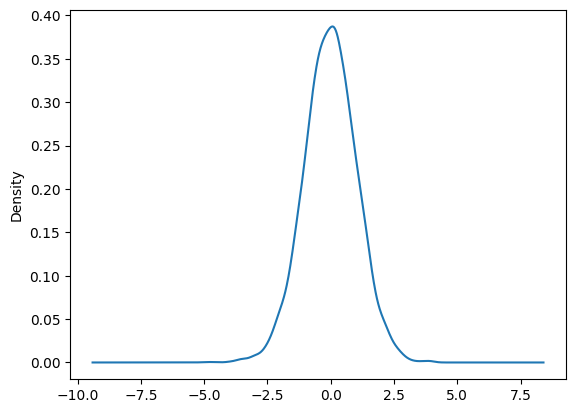

In [48]:
n = 20
m = 13
mu = 1
sig = 10
df = n + m


statistics = pd.Series([calc_statistic(*generate(mu, sig, n, mu, sig, m)) for i in range(5000)])
statistics.plot.density()

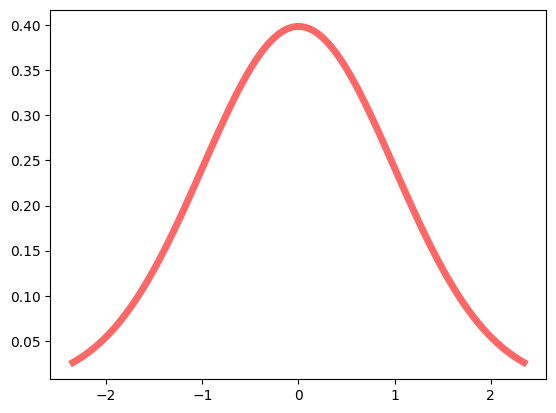

In [43]:
x = np.linspace(t.ppf(0.01, df),
                t.ppf(0.99, df), 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, t.pdf(x, df),
       'r-', lw=5, alpha=0.6, label='t pdf')
plt.show()

<Axes: ylabel='Density'>

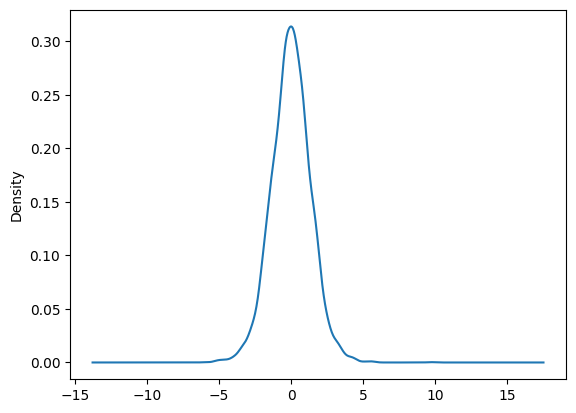

In [51]:
n = 20
m = 13
mu = 1
sig1 = 10
sig2 = 2000
df = n + m


statistics = pd.Series([calc_statistic(*generate(mu, sig1, n, mu, sig2, m)) for i in range(5000)])
statistics.plot.density()